<a href="https://colab.research.google.com/github/Jackil1993/GPT3_SCM/blob/main/OOP_queue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random 

In [ ]:
class Simulator():
  def __init__(self, beta=2., a=0.8, b=1.3, c=4., verbose=False, pl=False):
    #distr param 
    self.beta = beta
    self.a = a
    self.b = b
    self.c = c
    self.clock = 0.0
    self.queue = []
    self.next_arr = self.interarrival()
    self.next_dep = float('inf')
    self.timings = []
    self.size = []
    self.verbose = verbose
    self.pl = pl 
  def interarrival(self):
    return random.exponential(self.beta)
  def service(self):
    return random.triangular(self.a, self.b, self.c)
  def arrival(self):
    self.clock = self.next_arr
    self.next_arr = self.clock + self.interarrival()
    if len(self.queue) == 0:
      self.next_dep = self.clock + self.service()
    self.queue.append('o')
    if self.verbose == True:
      print('{0:.2f}: New customer has arrived. {1} customers are in the queue'.format(self.clock, len(self.queue)))
  def departure(self):
    self.clock = self.next_dep
    self.queue.pop()
    if len(self.queue) == 0:
      self.next_dep = float('inf')
    else:
      self.next_dep = self.clock + self.service()
    if self.verbose == True:
      print('{0:.2f}: A customer has been departured. {1} customers are in the queue'.format(self.clock, len(self.queue)))
  def advance_time(self):
    if self.next_arr <= self.next_dep:
      self.arrival()
    else:
      self.departure()
    self.timings.append(self.clock)
    self.size.append(len(self.queue))   
  def simulate(self):
    while self.clock < 500.:
      self.advance_time()
    if self.pl == True:
      plt.plot(self.timings, self.size, color='green')
      plt.xlabel('Time (days)')
      plt.ylabel('Q size')
      plt.grid(True)
      plt.show()

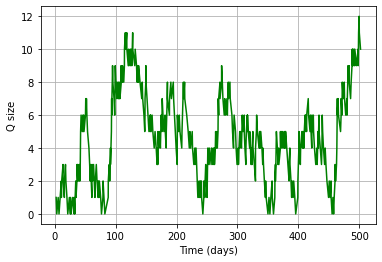

In [ ]:
simulation = Simulator(pl=True)
simulation.simulate()

In [ ]:
stats = []
for i in range(1000):
  simulation1 = Simulator()
  simulation1.simulate()
  stats.append(np.mean(simulation1.size))

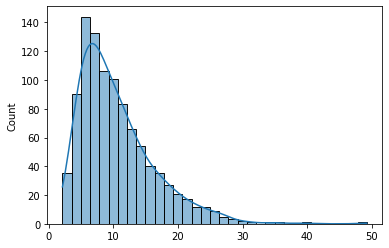

In [ ]:
sns.histplot(stats, kde=True)